# NLP - Hotel review sentiment analysis in python

In [ ]:
#warnings :)
import warnings
warnings.filterwarnings('ignore')

import os
dir_Path = '/content/train.csv'


Data Facts and Import


In [ ]:
import pandas as pd 
# Local directory
Reviewdata = pd.read_csv('train.csv')
#Data Credit - https://www.kaggle.com/anu0012/hotel-review/data
# pd.set_option('display.max_colwidth', None)

In [ ]:
# how big is our dataset
Reviewdata.shape

(38932, 5)

In [ ]:
# what portion of our response is actually happy
Reviewdata['Is_Response'].value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [ ]:
Reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.,Edge,Mobile,not happy
1,id10327,"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation.",Internet Explorer,Mobile,not happy
2,id10328,"I booked this hotel through Hotwire at the lowest price I could find. When we got there the front desk manager gave us a """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""smoking"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" room. I argued that I have a little baby and I would not have booked the room had I known it was smoking. The manager would not hear anything further and told me that Hotwire books the cheapest rooms that are available. So, from the get go I was very unhappy.\nAfter a great deal of persuasion and discussion, I got a nonsmoking room. Thereafter the room had the most minimal amenities. Besides the great location (near Dupont Circle), there was not much to say about this overpriced hotel. The room was small and in OK condition. The bathroom was small with a tub. The bathroom amenities were also minimal. We did not have a fridge or a microwave and had to again rent a fridge from the staff (to keep baby things).\nThe parking costs $-- per day so it is best not to drive here. Also the breakfast is not included. The lobby is very small and feels old. The only thing available is coffee in the lobby which is decent.\nAll in all, poor service, minimal amenities, small rooms, small bathrooms, no view, but great location. Some distance from the metro (either McPherson station or Dupont station). Try to look for better if available.",Mozilla,Tablet,not happy
3,id10329,"Stayed here with husband and sons on the way to an Alaska Cruise. We all loved the hotel, great experience. Ask for a room on the North tower, facing north west for the best views. We had a high floor, with a stunning view of the needle, the city, and even the cruise ships! We ordered room service for dinner so we could enjoy the perfect views. Room service dinners were delicious, too! You are in a perfect spot to walk everywhere, so enjoy the city. Almost forgot- Heavenly beds were heavenly, too!",InternetExplorer,Desktop,happy
4,id10330,"My girlfriends and I stayed here to celebrate our --th birthdays. We had planned this weekend getaway back in February, so we were all looking forward to it. There was - of us so we rented - ajoining rooms at the rate of $----night-room. We stayed - nights so with taxes and parking charges we spent in total over $----. All of us expected a certain level of service since we were staying at the Ritz, however this hotel certainly didn't meet what we would consider Ritz standards.\nThe rooms were fine. They were clean with well appointed bathroo

In [ ]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [ ]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id48301,1
Description,38932,38932,"We are Select Guest with the Omni, and we stay at Omni's all over the country. This Omni was like a discount Omni. The rooms were big, but they did not offer most of the amenities the other hotels do... nor were they polite when asked. In fact, the woman at the front desk was as rude as she could be, and there were staff sleeping in the lobby when we came in at midnight! We put our drink order on the door for the next morning...and it never came. They called us - hour early for our wake up call. The maid claims we had a Do Not Disturb on our door - and that is why our room was not cleaned one day - yet we NEVER use the Do Not Disturb sign. The hotel is clean and the rooms are large, but that is the only good thing I can say about this Omni. I would not stay there again.",1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


## Data Cleaning / Exploratory Data Analysis

In [ ]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


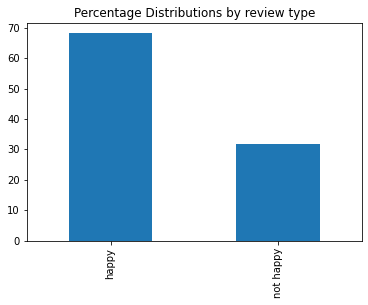

In [ ]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [ ]:
#Removing columns
Reviewdata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [ ]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [ ]:
# Let's take a look at the updated text
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.,not happy,the room was kind of clean but had a very strong smell of dogs generally below average but ok for a overnight stay if youre not too fussy would consider staying again if the price was right breakfast was free and just about better than nothing
1,"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation.",not happy,i stayed at the crown plaza april april the staff was friendly and attentive the elevators are tiny about by the food in the restaurant was delicious but priced a little on the high side of course this is washington dc there is no pool and little for children to do my room on the fifth floor had two comfortable beds and plenty of space for one person the tv is a little small by todays standards with a limited number of channels there was a small bit of mold in the bathtub area that could have been removed with a little bleach it appeared the carpets were not vacummed every day i reported a light bulb was burned out it was never replaced ice machines are on the odd numbered floors but the one on my floor did not work i encountered some staff in the elevator one evening and i mentioned the ice machine to them severel hours later a maid appeared at my door with ice and two mints im not sure how they knew what room i was in that was a little unnerving i would stay here again for business but would not come here on vacation
2,"I booked this hotel through Hotwire at the lowest price I could find. When we got there the front desk manager gave us a """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""smoking"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" room. I argued that I have a little baby and I would not have booked the room had I known it was smoking. The manager would not hear anything further and told me that Hotwire books the cheapest rooms that are available. So, from the get go I was very unhappy.\nAfter a great deal of persuasion and discussion, I got a nonsmoking room. Thereafter the room had the most minimal amenities. Besides the great location (near Dupont Circle), there was not much to say about this overpriced hotel. The room was small and in OK condition. The bathroom was small with a tub. The bathroom amenities were also minimal. We did not have a fridge or a microwave and had to again rent a fridge from the staff (to keep baby things).\nThe parking costs $-- per day so it is best not to drive here. Also the breakfast is not included. The lobby is very small and feels old. The only thing available is coffee in the lobby which is decent.\nAll in all, poor service, minimal amenities, small rooms, small bathrooms, no view, but great location. Some distance from the metro (either 

In [ ]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [ ]:
# Let's take a look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.,not happy,the room was kind of clean but had a very strong smell of dogs generally below average but ok for a overnight stay if youre not too fussy would consider staying again if the price was right breakfast was free and just about better than nothing,the room was kind of clean but had a very strong smell of dogs generally below average but ok for a overnight stay if youre not too fussy would consider staying again if the price was right breakfast was free and just about better than nothing
1,"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation.",not happy,i stayed at the crown plaza april april the staff was friendly and attentive the elevators are tiny about by the food in the restaurant was delicious but priced a little on the high side of course this is washington dc there is no pool and little for children to do my room on the fifth floor had two comfortable beds and plenty of space for one person the tv is a little small by todays standards with a limited number of channels there was a small bit of mold in the bathtub area that could have been removed with a little bleach it appeared the carpets were not vacummed every day i reported a light bulb was burned out it was never replaced ice machines are on the odd numbered floors but the one on my floor did not work i encountered some staff in the elevator one evening and i mentioned the ice machine to them severel hours later a maid appeared at my door with ice and two mints im not sure how they knew what room i was in that was a little unnerving i would stay here again for business but would not come here on vacation,i stayed at the crown plaza april april the staff was friendly and attentive the elevators are tiny about by the food in the restaurant was delicious but priced a little on the high side of course this is washington dc there is no pool and little for children to do my room on the fifth floor had two comfortable beds and plenty of space for one person the tv is a little small by todays standards with a limited number of channels there was a small bit of mold in the bathtub area that could have been removed with a little bleach it appeared the carpets were not vacummed every day i reported a light bulb was burned out it was never replaced ice machines are on the odd numbered floors but the one on my floor did not work i encountered some staff in the elevator one evening and i mentioned the ice machine to them severel hours later a maid appeared at my door with ice and two mints im not sure how they knew what room i was in that was a little unnerving i would stay here again for business but would not come here on vacation
2,"I booked this hot

## Model training 

In [ ]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.Is_Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 35038
IV_test  : 3894
DV_train : 35038
DV_test  : 3894


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[2418,  305],
       [ 153, 1018]])

## Model prediciton 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8823831535695943
Precision :  0.8890590818181386
Recall :  0.8823831535695943


## Trying on new reviews 

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/jakevdp/PythonDataScienceHandbook.git cloned-repo
%cd cloned-repo
!ls

In [ ]:
example = ["I'm not satisfy"]
result = model.predict(example)

print(result)

['not happy']
